In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/Different_stores_dataset.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB
None

First f

In [6]:

# 1. Handling Missing Values
# Dropping rows with any missing values
df_cleaned = df.dropna()

# 2. Correcting Data Types
# Ensuring 'age' is of integer type
df_cleaned['age'] = df_cleaned['age'].astype(int)

# Ensuring 'quantity' is of integer type
df_cleaned['quantity'] = df_cleaned['quantity'].astype(int)

# Ensuring 'customer_id' is treated as a string (if IDs are not purely numeric or have leading zeroes)
df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(str)

# 3. Removing Duplicate Entries
df_cleaned = df_cleaned.drop_duplicates()

# Display information about the cleaned dataset
print("Cleaned Dataset Information:")
print(df_cleaned.info())

# Optional: Save the cleaned dataset to a new file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 10.6+ MB
None


Descriptive Statistics:
                age      quantity  selling_price_per_unit  cost_price_per_unit
count  99457.000000  99457.000000            99457.000000         99457.000000
mean      43.427089      3.004424              689.256321           605.113854
std       14.990054      1.415237              941.184567           858.838256
min       18.000000      1.000000                5.230000             3.661000
25%       30.000000      2.000000               45.450000            31.815000
50%       43.000000      3.000000              203.300000           162.640000
75%       56.000000      4.000000             1200.320000          1080.306000
max       69.000000     15.000000             5250.000000          4725.000000


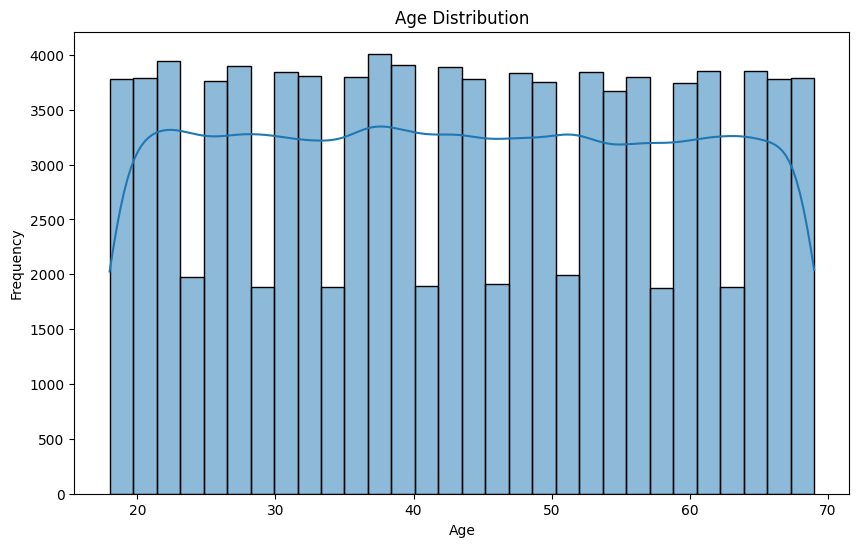

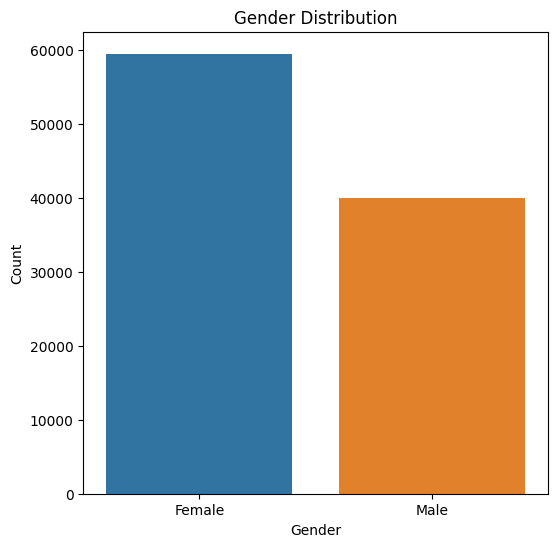

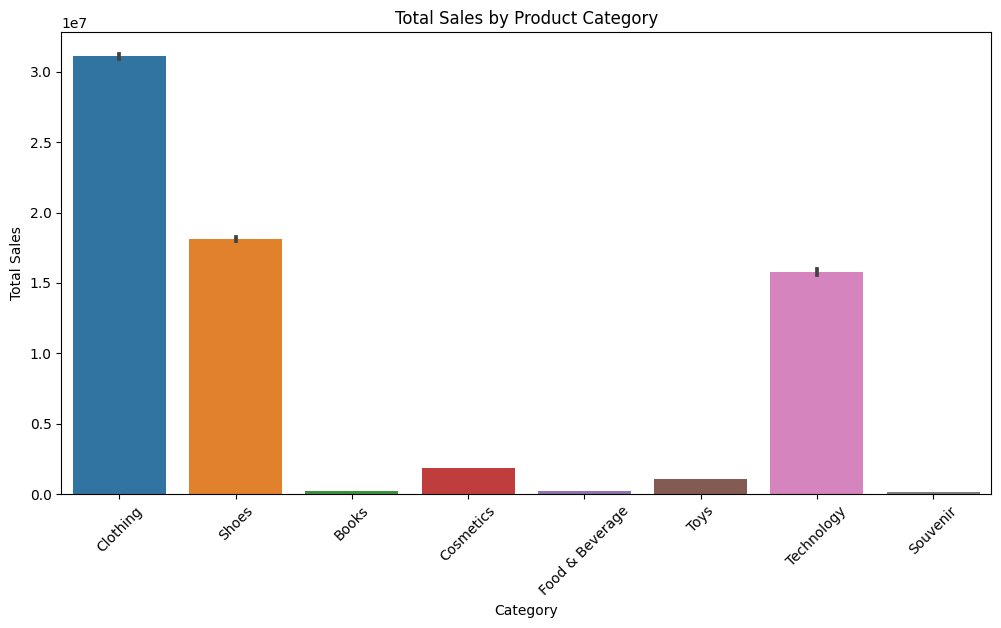

<ipython-input-7-f60b9f7fde39>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')


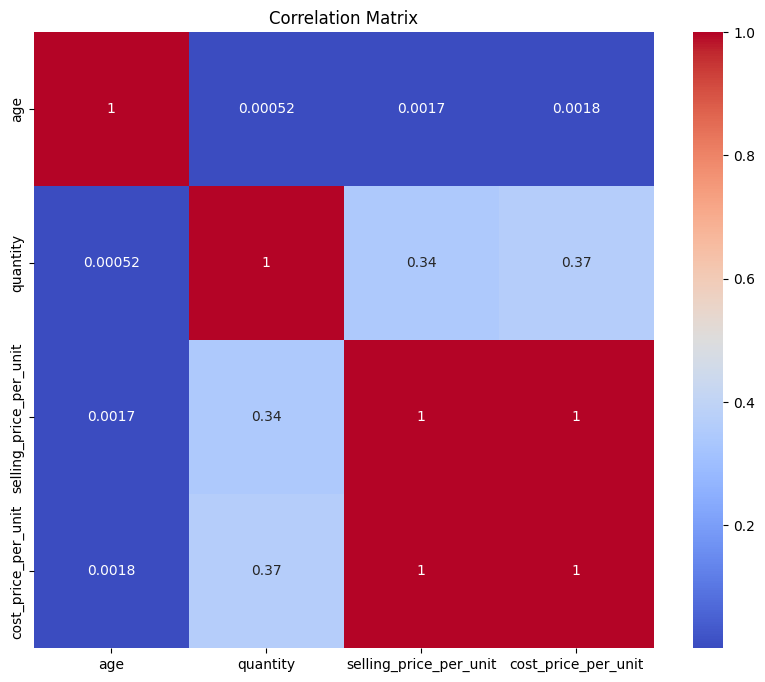

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_cleaned.describe())

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df_cleaned)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Sales by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='selling_price_per_unit', data=df_cleaned, estimator=sum)
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


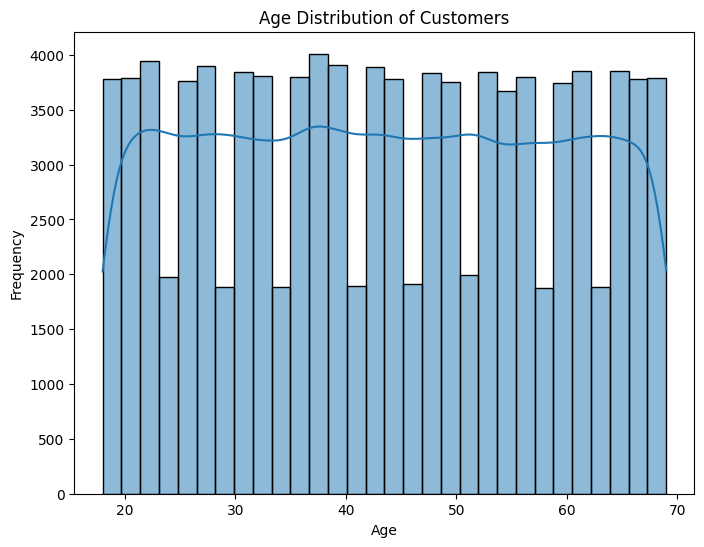

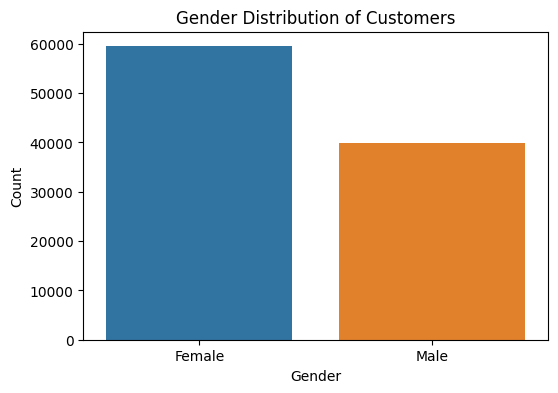

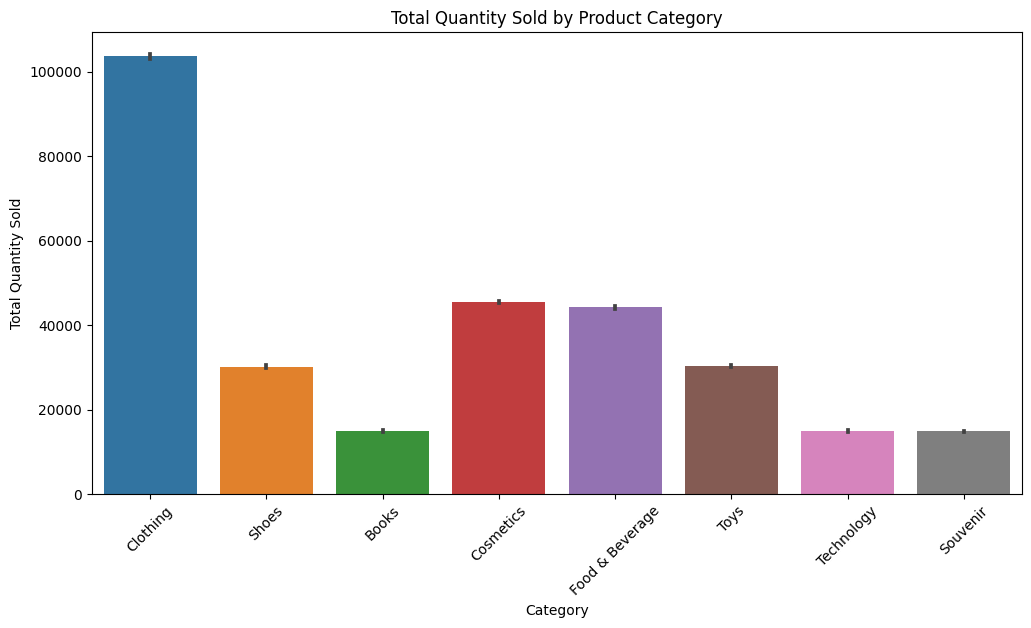

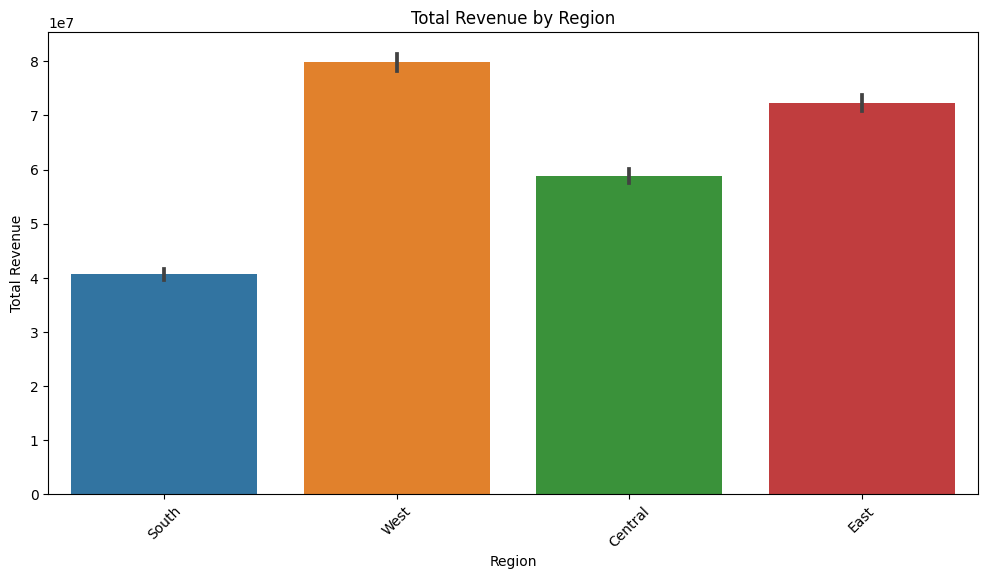

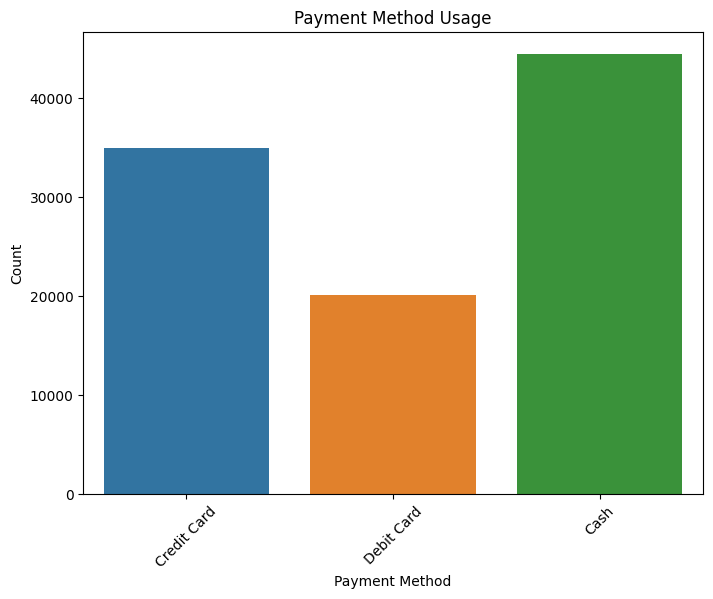

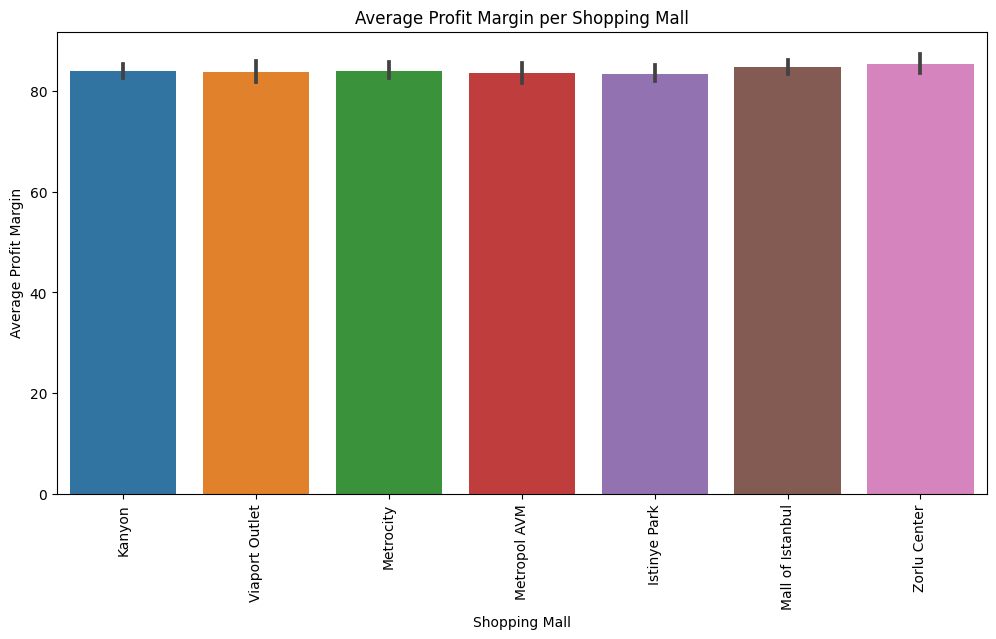

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# 1. Age Distribution of Customers
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3. Sales by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='quantity', data=df, estimator=sum)
plt.title("Total Quantity Sold by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# 4. Sales Revenue by Region
plt.figure(figsize=(12, 6))
df['total_revenue'] = df['quantity'] * df['selling_price_per_unit']
sns.barplot(x='region', y='total_revenue', data=df, estimator=sum)
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# 5. Payment Method Usage
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_method', data=df)
plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6. Average Profit Margin per Shopping Mall
plt.figure(figsize=(12, 6))
df['profit_margin'] = df['selling_price_per_unit'] - df['cost_price_per_unit']
sns.barplot(x='shopping_mall', y='profit_margin', data=df, estimator=np.mean)
plt.title("Average Profit Margin per Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Average Profit Margin")
plt.xticks(rotation=90)
plt.show()

# You can add more visualizations as per your specific analysis requirements.


In [9]:


# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# 1. Profit Margin Per Unit
# Calculating profit margin for each unit sold
df['profit_margin_per_unit'] = df['selling_price_per_unit'] - df['cost_price_per_unit']

# 2. Total Transaction Value
# Calculating the total value of each transaction
df['total_transaction_value'] = df['quantity'] * df['selling_price_per_unit']

# 3. Customer Age Group
# Categorizing customers into age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 4. Price Range Category
# Categorizing products into price ranges
price_bins = [0, 50, 100, 500, 1000, 5000]
price_labels = ['Budget', 'Economy', 'Mid-Range', 'Premium', 'Luxury']
df['price_range'] = pd.cut(df['selling_price_per_unit'], bins=price_bins, labels=price_labels, right=False)

# 5. Region-State Concatenation
# Combining region and state into a single feature for more detailed geographic analysis
df['region_state'] = df['region'] + '-' + df['state']

# 6. Frequency of Customer Visits
# Counting the number of transactions per customer as an indicator of visit frequency
df['visit_frequency'] = df.groupby('customer_id')['invoice_no'].transform('count')

# Save the enhanced dataset with new features
df.to_csv('enhanced_dataset_with_features.csv', index=False)

# You can add more features based on your specific analysis goals.


In [12]:
df_encoded['quantity'] = df_encoded['quantity'].astype(float)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the enhanced dataset with features
df = pd.read_csv('enhanced_dataset_with_features.csv')

# Select only numeric columns for the model (excluding the target variable 'quantity')
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('quantity')  # Exclude the target variable

# Feature set (only numeric columns)
X = df[numeric_columns]

# Target variable
y = df['quantity']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting and Evaluating
y_pred = rf_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.00504653590426327


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
import pandas as pd

# Extracting feature importances
important_features = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Displaying the top important features
print("Top Important Features:")
print(important_features.head())


Top Important Features:
total_transaction_value    0.624977
profit_margin_per_unit     0.233525
selling_price_per_unit     0.081087
cost_price_per_unit        0.060408
age                        0.000003
dtype: float64


In [22]:
# Insights and Recommendations based on the feature importances
# This part is more subjective and depends on your specific business context
# Example:
if 'age_group_Young Adult' in important_features.head().index:
    print("Recommendation: Focus marketing efforts on the Young Adult age group.")
if 'category_Electronics' in important_features.head().index:
    print("Recommendation: Optimize inventory for the Electronics category.")


**Observations**


Total Transaction Value (62.5%): Imagine you're buying stuff at a store. The total amount of money you spend on your purchase each time is really important in predicting how much a store will sell. This is like if a store knows that on average, customers spend $50 per visit, they can guess how much they'll sell in a day based on how many customers visit.

Profit Margin Per Unit (23.35%): Think of this as how much extra money the store makes on each item it sells. For example, if a store buys a phone for 200 and sells it for 300, the extra 100 is really important to understand sales. This is like knowing how much pocket money you earn from each chore you do at home.

Selling Price Per Unit (8.11%): This is about how much an item is sold for. If a store sells more expensive items, it's a big clue to predicting sales. It's like if you sell lemonade: selling it for 2 per cup instead of 1 makes a big difference in how much money you make.

Cost Price Per Unit (6.04%): This is the original price the store paid for the items before selling them. If a store pays a lot for its items, it can affect how much they sell. This is like if you buy a pack of stickers for $5 and then try to sell each sticker; the cost of the stickers is important for how you price them and how many you can sell.

Age (Nearly 0%): Surprisingly, the age of the customers isn’t really making a big difference in predicting sales in this case. It's like saying it doesn't matter if a kid or an adult buys the lemonade; it doesn't change much about how much lemonade you sell.
